In [3]:
import nltk, re, pprint
from nltk import word_tokenize

# 3.1   Accessing Text from the Web and from Disk

Playing with *Crime and Punishment*

(url: [project gutenberg](http://www.gutenberg.org/catalog/))

In [37]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [38]:
len(raw)

1176896

**Tokenization**: We want to split the text string into a list of words and punctuation, so we can easily work with it.

In [12]:
tokens = word_tokenize(raw)

In [20]:
print(type(tokens))
print(len(tokens))
print(tokens[0:25])

<class 'list'>
254352
['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by', 'Fyodor', 'Dostoevsky', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and']


Turn text list into NLTK text. This allows us to do a lot of convenient things, easily

In [25]:
text = nltk.Text(tokens)
print(type(text))
print(text[1100:1130])

<class 'nltk.text.Text'>
['with', 'garret', ',', 'dinners', ',', 'and', 'attendance', ',', 'lived', 'on', 'the', 'floor', 'below', ',', 'and', 'every', 'time', 'he', 'went', 'out', 'he', 'was', 'obliged', 'to', 'pass', 'her', 'kitchen', ',', 'the', 'door']


In [27]:
# expressions of multiple words that commonly occur
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; Nikodim Fomitch; young man; Ilya Petrovitch; n't know;
Project Gutenberg; Dmitri Prokofitch; Andrey Semyonovitch; Hay Market


## Find where text begins and ends. We must do this manually :(

In [47]:
begin = raw.find("PART I")
end = raw.find("End of Project Gutenberg's Crime")
raw = raw[begin:end]

In [52]:
tokens = word_tokenize(raw)
text = nltk.Text(tokens)
print(text[0:200])

['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.', 'He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase', '.', 'His', 'garret', 'was', 'under', 'the', 'roof', 'of', 'a', 'high', ',', 'five-storied', 'house', 'and', 'was', 'more', 'like', 'a', 'cupboard', 'than', 'a', 'room', '.', 'The', 'landlady', 'who', 'provided', 'him', 'with', 'garret', ',', 'dinners', ',', 'and', 'attendance', ',', 'lived', 'on', 'the', 'floor', 'below', ',', 'and', 'every', 'time', 'he', 'went', 'out', 'he', 'was', 'obliged', 'to', 'pass', 'her', 'kitchen', ',', 'the', 'door', 'of', 'which', 'invariably', 'stood', 'open', '.', 'And', 'each', 'time', 'he', 'passed', ',', 'the', 'young', 'man', 'had', 'a', 'sick',

# HTML Example

In [54]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')

In [57]:
html[0:100]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose'

In [58]:
from bs4 import BeautifulSoup

In [72]:
raw = BeautifulSoup(html, 'lxml').get_text()
tokens = word_tokenize(raw)
# manually find start/stop of text
start = 110
end = 390
tokens = tokens[110:390]
text = nltk.Text(tokens)

In [73]:
print(text)

<Text: UK Blondes 'to die out in 200 years'...>


In [77]:
text.concordance('blonde')

Displaying 4 of 4 matches:
rts in Germany suggests people with blonde hair are an endangered species and 
hers predict the last truly natural blonde will be born in Finland - the count
two centuries . The problem is that blonde hair is caused by a recessive gene 
gene . In order for a child to have blonde hair , it must have the gene on bot


In [78]:
text.collocations()

blonde hair; Jonathan Rees; n't disappear; blondes would; blondes may


# Local Files

In [105]:
doc = "/Users/jared/Desktop/vgg_for_dogs.py"
f = open(doc)
raw = f.read()


In [92]:
# f = open(doc)
# for i in f:
#     print(i.strip())

In [104]:
# same as above but with nltk
path = nltk.data.find(doc)
raw = open(path).read()
raw = nltk.Text(raw)

# Capturing User Input

In [106]:
s = input('Enter some text')

Enter some texthey i am jared


In [109]:
print("you typed", len(word_tokenize(s)), "words")

you typed 4 words


In [116]:
from nltk.corpus import gutenberg
raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)

[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]

In [118]:
# view order of character usage
print([char for (char, count) in fdist.most_common()])

['e', 't', 'a', 'o', 'n', 'i', 's', 'h', 'r', 'l', 'd', 'u', 'm', 'c', 'w', 'f', 'g', 'p', 'b', 'y', 'v', 'k', 'q', 'j', 'x', 'z']


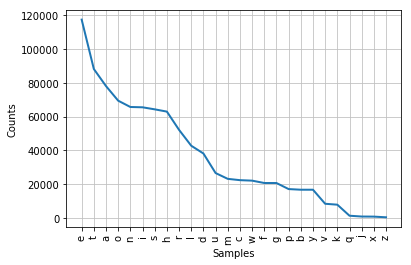

In [119]:
fdist.plot()

In [121]:
x = 'This is a test sentence writing for pactice teat tea'
x.find('test')

10

In [122]:
'\u0144'

'ń'

In [123]:
'\u0144'.encode('utf8')

b'\xc5\x84'

# Regular Expressions and Their Applications

In [145]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
print(len(wordlist))
wsj = sorted(set(nltk.corpus.treebank.words()))

210687


In [127]:
# Find all words that end with 'ed'
#   note: $ is a special character that signifies the end of a word
eds = [w for w in wordlist if re.search('ed$', w)]
print(len(eds))
print(eds[0:10])
# print (nltk.FreqDist(w.lower() for w in eds).most_common(10)) # all 1

9148
['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']
[('abaissed', 1), ('abandoned', 1), ('abased', 1), ('abashed', 1), ('abatised', 1), ('abed', 1), ('aborted', 1), ('abridged', 1), ('abscessed', 1), ('absconded', 1)]


In [134]:
# pattern where j is third letter, then t 3 after j.
# note that the ^ and $ are required
[w for w in wordlist if re.search('^..j..t..$',w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

In [136]:
# find 'textonyms'
[w for w in wordlist if re.search('^[def][abc][mno][mno]$', w)]

['damn', 'ebon', 'faon']

In [140]:
# find words only in row 2
[w for w in wordlist if re.search('^[g-o]{4}$',w)]

In [167]:
# Find number of occurences of two vowels in word list
two_vowels = [v for w in wordlist
             for v in re.findall(r'[aeiuo]{2}', w)]
two_vowel_counts = nltk.FreqDist(two_vowels).most_common(5)

In [169]:
two_vowel_counts

[('io', 14439), ('ia', 11031), ('ou', 9897), ('ea', 8127), ('oo', 4518)]

In [173]:
'2009-12-31'
[int(n) for n in re.findall("[0-9]{2,4}",'2009-12-31')]

[2009, 12, 31]

In [182]:
# compress words
regex = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    piece = re.findall(regex, word)
    return ''.join(piece)

english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:100]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and
blf and frdm frm fr and wnt hs bn prclmd as the hghst asprtn of the
cmmn pple , Whrs it is essntl , if


In [180]:
re.findall(regex, 'independence')

['i', 'n', 'd', 'p', 'n', 'd', 'n', 'c', 'e']

In [208]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')

In [218]:
# Extract consonant-vowel sequences
ptrn = r"[bcdfghjklmnpqrstvwxz][aeiouy]"
cvs = [cv for wrd in rotokas_words for cv in re.findall(ptrn, wrd)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
b   0   0   0   1   0 
d   0   0   0   1   0 
g   2   0   1   4   1 
k 418 148  94 420 173 
l   0   0   1   0   0 
m   0   1   0   0   0 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


In [223]:
# create list of words allowing us to find which words contain a particular index
cv_word_pairs = [(cv, word) for word in rotokas_words
                for cv in re.findall(ptrn, word)]

cv_index = nltk.Index(cv_word_pairs)
cv_index['so']

['kaekaesoto', 'kekesopa']

# Finding Word Stems

Ignore word endings; e.g. identify both *laptops* and *laptop*

In [226]:
# Approach 1: Define basic function to strip suffixes
def stem(word):
    for suffix in ['s', 'es', 'ment', 'ly', 'ing', 'ed', 'ious', 'ive', 'ies']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
        
for w in ['groceries', 'dinosaurs', 'happening', 'splendidly']:
    print(stem(w))

grocerie
dinosaur
happen
splendid


In [231]:
# Approach 2: Use regex

# find word that starts with anything, then ends with suffix
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

In [240]:
# same as above, but return the stem word
re.findall(r"(^.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$", 'processes')

[('process', 'es')]

In [258]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

In [259]:
def stem2(word):
    stem,suffix = re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', word)[0]
    return stem

In [263]:
raw = word_tokenize("This is a demo paragraph. I'm writing this as I drive back from Berkeley to San Diego. Currently \
                   I'm passing through Los Angeles. 2 more hours and we should be home, god willng.")
print([stem2(w) for w in raw])


['Thi', 'i', 'a', 'demo', 'paragraph', '.', 'I', "'m", 'writ', 'thi', 'a', 'I', 'dr', 'back', 'from', 'Berkeley', 'to', 'San', 'Diego', '.', 'Current', 'I', "'m", 'pass', 'through', 'Lo', 'Angel', '.', '2', 'more', 'hour', 'and', 'we', 'should', 'be', 'home', ',', 'god', 'willng', '.']


# Search Tokenized Text

Search across multiple words in a text

In [265]:
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [273]:
whale_fd = moby.findall(r"<the> (<.*>) <whale>")

wounded; great; great; mighty; sperm; sperm; sperm; Norwegian;
wondrous; American; American; sperm; dying; Greenland; Greenland;
Greenland; Greenland; sperm; sperm; entire; Trumpa; Physeter; Sperm;
Greenland; right; sperm; right; right; sperm; humpbacked; Greenland;
Greenland; Greenland; sperm; sperm; Hyena; Tusked; Horned; Unicorn;
Folio; white; white; white; white; white; white; white; white; white;
Albino; sperm; sperm; entire; sperm; sperm; white; white; sperm;
sperm; sperm; sperm; sperm; right; sperm; English; snowy; true; Right;
stranded; living; Greenland; boiling; foremost; particular; sperm;
spermaceti; sperm; stricken; sperm; waning; same; heaving; tremendous;
great; beheaded; mightiest; great; sperm; dead; towing; fagged; sperm;
right; sperm; sperm; stricken; wounded; sunken; sunken; first;
stricken; flying; towing; whole; sperm; towing; unborn; stricken;
schoolmaster; controverted; drugged; other; blasted; other; lighter;
Dutch; slack; stricken; sperm; white; other; adult; 

In [278]:
# from nltk.corpus import brown
# hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
# hobbies_learned.findall(r"<as> <\w*> <as> <\w*>")

# Normalizing Text

**stemming**: strip of any affixes

**lemmatization**: make sure the resulting token exists in a dictionary

## nltk provides its own stemmers. User Porter

In [280]:
porter = nltk.PorterStemmer()
[porter.stem(i) for i in ['testing','the', 'stemmer', 'provided','by','porter']]

['test', 'the', 'stemmer', 'provid', 'by', 'porter']

In [282]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(i) for i in ['testing','the', 'stemmer', 'provided','by','porter']]

['testing', 'the', 'stemmer', 'provided', 'by', 'porter']

# 3.7 Regular Expressions for Tokenizing Text

**Tokenization**: Cutting a string into identifiable linguistic units

In [286]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'"""

In [292]:
# Easiest tokenization: Split on white-space

# must match any number of tabs, newlines, or spaces
print(re.split(r"\s+", raw))#print(re.split('[ \n\t]+', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'"]


In [296]:
# split on any character not a word character: ~[A-Za-z0-9_]
print( re.split(r"[^A-Za-z0-9_]", raw)) # same as re.split(r"\W", raw)

['', 'When', 'I', 'M', 'a', 'Duchess', '', '', 'she', 'said', 'to', 'herself', '', '', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', '', '', '', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '', 'Soup', 'does', 'very', 'well', 'without', '', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '', '']


In [300]:
# similar: FIND all words, then all words that begin with non-space character
print( re.findall(r"\w+|\S\w+", raw)) # find all word chars that occur once or more, and all nonspace before words

["'When", 'I', "'M", 'a', 'Duchess', 'she', 'said', 'to', 'herself', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 'people', 'hot', '-tempered']


In [301]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'"]


# 3.8 Segmentation

### Sentence Segmentation

In [303]:
# sentence segmentation
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
sents[10:15]

['But we were young; we lived to see God break their bitter charms.',
 'God and the good Republic come riding back in arms:\nWe have seen the City of Mansoul, even as it rocked, relieved--\nBlessed are they who did not see, but being blind, believed.',
 'This is a tale of those old fears, even of those emptied hells,\nAnd none but you shall understand the true thing that it tells--\nOf what colossal gods of shame could cow men and yet crash,\nOf what huge devils hid the stars, yet fell at a pistol flash.',
 'The doubts that were so plain to chase, so dreadful to withstand--\nOh, who shall understand but you; yea, who shall understand?',
 "The doubts that drove us through the night as we two talked amain,\nAnd day had broken on the streets e'er it broke upon the brain."]